In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.6.0


In [3]:
import os

# direktori base
base_dir = 'rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# membuat direktori/folder train dan validation
# os.mkdir(train_dir)
# os.mkdir(validation_dir)

# melihat isi direktori
os.listdir('rockpaperscissors')

['paper',
 'README_rpc-cv-images.txt',
 'rock',
 'rps-cv-images',
 'scissors',
 'train',
 'val']

In [4]:
# membagi direktori
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [5]:
# membagi setiap direktori menjadi data train dan data validasi

from sklearn.model_selection import train_test_split

train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [6]:
# data train ditempatkan dalam train_dir
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

# data validasi ditempatkan di validation_dir
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

# membuat folder train dan validasi karena train_xx dan val_xx belum dibuat
# folder baru di buat di dalam folder train dan val
# misal train_rock berarti ada pada folder rockpaperscissors/train/train_rock
# begitupun pada folder val_xx

if not os.path.exists(train_rock):
    os.mkdir(train_rock)

if not os.path.exists(train_paper):
    os.mkdir(train_paper)
    
if not os.path.exists(train_scissors):
    os.mkdir(train_scissors)
    
if not os.path.exists(val_rock):
    os.mkdir(val_rock)

if not os.path.exists(val_paper):
    os.mkdir(val_paper)
    
if not os.path.exists(val_scissors):
    os.mkdir(val_scissors)

In [17]:
# mengcopy citra ke dalam direktori/folder train dan val
# citra sebelumnya sudah di split menjadi data train dan data validasi
import shutil

for i in train_rock_dir:
    shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
    shutil.copy(os.path.join(paper_dir, i), os.path.join(train_paper, i))
for i in train_scissors_dir:
    shutil.copy(os.path.join(scissors_dir, i), os.path.join(train_scissors, i))
    
for i in val_rock_dir:
    shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock, i))
for i in val_paper_dir:
    shutil.copy(os.path.join(paper_dir, i), os.path.join(val_paper, i))
for i in val_scissors_dir:
    shutil.copy(os.path.join(scissors_dir, i), os.path.join(val_scissors, i))

In [7]:
# melihat berapa banyak citra yang ada pada direktori train/rock
len(os.listdir('rockpaperscissors/train/rock'))

435

In [8]:
# menentukan parameter untuk augmentasi gambar data train dan validasi
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 20,
                                  horizontal_flip = True,
                                  shear_range = 0.2,
                                  fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 20,
                                  horizontal_flip = True,
                                  shear_range = 0.2,
                                  fill_mode = 'nearest')

In [9]:
# preprocessing citra data train dan validasi

train_generator = train_datagen.flow_from_directory(train_dir, # direktori data train
                                                   target_size = (150, 150), # mengubah resolusi menjadi 150x150 px
                                                   batch_size = 32,
                                                   class_mode = 'categorical') #klasifikasi 3 kelas
validation_generator = test_datagen.flow_from_directory(validation_dir, # direktori data validasi
                                                        target_size = (150,150), # mengubah resolusi menjadi 150x150px
                                                        batch_size = 32,
                                                        class_mode = 'categorical' #klasifikasi 3 kelas
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [10]:
# membangun arsitektur sebuah CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), #resolusi
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [11]:
# memanggil fungsi compile pada objek model
model.compile(loss='categorical_crossentropy', # klasifikasi 3 kelas
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
# saving best model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("rock_paper_scissors.h5",
                             monitor="val_loss",
                             save_best_only = True,
                             verbose=1,
                             mode = 'auto',
                             save_freq = 'epoch')

In [13]:
# pelatihan mode;
history = model.fit(
    train_generator,
    steps_per_epoch = 25, # jumlah batch yang akan dieksekusi pada tiap epoch
    epochs = 20, # banyaknya epoch
    validation_data = validation_generator, # menampilkan akurasi
    validation_steps = 5, # jumlah batch yang akan dieksekusi tiap epoch
    callbacks = checkpoint # menyimpan model terbaik
)

Epoch 1/20
25/25 [==============================] - 70s 2s/step - loss: 0.9836 - accuracy: 0.4950 - val_loss: 0.8297 - val_accuracy: 0.6500

Epoch 00001: val_loss improved from inf to 0.82966, saving model to rock_paper_scissors.h5
Epoch 2/20
25/25 [==============================] - 39s 2s/step - loss: 0.4877 - accuracy: 0.8250 - val_loss: 0.3337 - val_accuracy: 0.9187

Epoch 00002: val_loss improved from 0.82966 to 0.33367, saving model to rock_paper_scissors.h5
Epoch 3/20
25/25 [==============================] - 31s 1s/step - loss: 0.2863 - accuracy: 0.9025 - val_loss: 0.1877 - val_accuracy: 0.9312

Epoch 00003: val_loss improved from 0.33367 to 0.18769, saving model to rock_paper_scissors.h5
Epoch 4/20
25/25 [==============================] - 29s 1s/step - loss: 0.2971 - accuracy: 0.8913 - val_loss: 0.2531 - val_accuracy: 0.9250

Epoch 00004: val_loss did not improve from 0.18769
Epoch 5/20
25/25 [==============================] - 28s 1s/step - loss: 0.1954 - accuracy: 0.9400 - val_

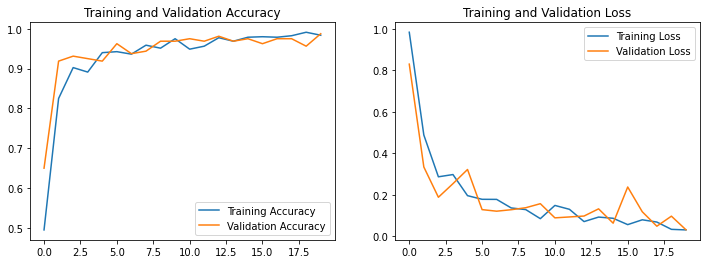

In [14]:
# visualisasi data hasil pelatihan model

from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Load The Model

[[0. 0. 1.]]
Prediksi =====> Scissors


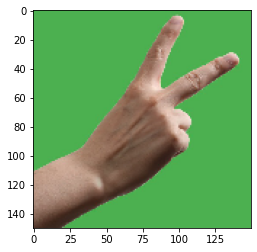

In [21]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline


model = load_model('rock_paper_scissors.h5')

img = image.load_img('scissors.jpg', target_size = (150, 150)) # ubah resolusi gambar menjadi 150x150 sesuai model
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=16)

print(classes)
if classes[0, 0]!=0:
    print('Prediksi =====> Paper')
elif classes[0, 1]!=0:
    print('Prediksi =====> Rock')
else:
    print('Prediksi =====> Scissors')